In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('quora.csv')

In [3]:
df = df.sample(30000)

In [4]:
df.head()

,Unnamed: 0,index,id,qid1,qid2,question1,question2,is_duplicate
90863,90863,322458,322458,448269,359896,How do you know if you are bisexual or bicurious?,How do you know if you're bisexual or bicurious?,1
65994,65994,95389,95389,131182,159094,Why is Eunuch and Son of Bitch more worried th...,"India: Why is that despite of Myanmar, Cambodi...",0
49790,49790,86180,86180,145376,145377,I had so many very big and tight pimples on my...,What happened to Ritchie Valen's family after ...,0
71726,71726,32727,32727,60209,60210,Is Donald Trump fit to be president?,Would Donald Trump be a good president?,1
5535,5535,210690,210690,315332,206784,How do you hack someone's Snapchat?,How can I hack my snapchat password?,1


In [5]:
df = df.drop('Unnamed: 0',axis=1)

In [6]:
df.shape

(30000, 7)

In [7]:
df = df.drop('index',axis=1)

In [8]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
90863,322458,448269,359896,How do you know if you are bisexual or bicurious?,How do you know if you're bisexual or bicurious?,1
65994,95389,131182,159094,Why is Eunuch and Son of Bitch more worried th...,"India: Why is that despite of Myanmar, Cambodi...",0
49790,86180,145376,145377,I had so many very big and tight pimples on my...,What happened to Ritchie Valen's family after ...,0
71726,32727,60209,60210,Is Donald Trump fit to be president?,Would Donald Trump be a good president?,1
5535,210690,315332,206784,How do you hack someone's Snapchat?,How can I hack my snapchat password?,1


In [9]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    q = q.replace('$','Dollar')
    q = q.replace("%","Percent")
    q = q.replace("₹","Rupee")
    q = q.replace("€","euro")
    q = q.replace("@","at")
    
    q = q.replace("[math]","")
    
    q = q.replace(",000,000,000","b")
    q = q.replace(",000,000","m")
    q = q.replace(",000","k")
    q = re.sub(r'([0-9]+)000000000',r"\1b",q)
    q = re.sub(r'([0-9]+)000000',r"\1m",q)
    q = re.sub(r'([0-9]+)000',r"\1k",q)
    
    contractions = { 
                    "ain't": "am not",
                    "aren't": "are not",
                    "can't": "cannot",
                    "can't've": "cannot have",
                    "'cause": "because",
                    "could've": "could have",
                    "couldn't": "could not",
                    "couldn't've": "could not have",
                    "didn't": "did not",
                    "doesn't": "does not",
                    "don't": "do not",
                    "hadn't": "had not",
                    "hadn't've": "had not have",
                    "hasn't": "has not",
                    "haven't": "have not",
                    "he'd": "he had",
                    "he'd've": "he would have",
                    "he'll": "he shall",
                    "he'll've": "he shall have",
                    "he's": "he has",
                    "how'd": "how did",
                    "how'd'y": "how do you",
                    "how'll": "how will",
                    "how's": "how has",
                    "I'd": "I had",
                    "I'd've": "I would have",
                    "I'll": "I shall",
                    "I'll've": "I shall have",
                    "I'm": "I am",
                    "I've": "I  have",
                    "isn't": "is not",
                    "it'd": "it had",
                    "it'd've": "it would have",
                    "it'll": "it shall",
                    "it'll've": "it shall have",
                    "it's": "it has",
                    "let's": "let us",
                    "ma'am": "madam",
                    "mayn't": "may not",
                    "might've": "might have",
                    "mightn't": "might not",
                    "mightn't've": "might not have",
                    "must've": "must have",
                    "mustn't": "must not",
                    "mustn't've": "must not have",
                    "needn't": "need not",
                    "needn't've": "need not have",
                    "o'clock": "of the clock",
                    "oughtn't": "ought not",
                    "oughtn't've": "ought not have",
                    "shan't": "shall not",
                    "sha'n't": "shall not",
                    "shan't've": "shall not have",
                    "she'd": "she had",
                    "she'd've": "she would have",
                    "she'll": "she shall",
                    "she'll've": "she shall have",
                    "she's": "she has",
                    "should've": "should have",
                    "shouldn't": "should not",
                    "shouldn't've": "should not have",
                    "so've": "so have",
                    "so's": "so as",
                    "that'd": "that would",
                    "that'd've": "that would have",
                    "that's": "that has",
                    "there'd": "there had",
                    "there'd've": "there would have",
                    "there's": "there has",
                    "they'd": "they had",
                    "they'd've": "they would have",
                    "they'll": "they shall",
                    "they'll've": "they shall have",
                    "they're": "they are",
                    "they've": "they have",
                    "to've": "to have",
                    "wasn't": "was not",
                    "we'd": "we had",
                    "we'd've": "we would have",
                    "we'll": "we will",
                    "we'll've": "we will have",
                    "we're": "we are",
                    "we've": "we have",
                    "weren't": "were not",
                    "what'll": "what shall",
                    "what'll've": "what shall have",
                    "what're": "what are",
                    "what's": "what has",
                    "what've": "what have",
                    "when's": "when has",
                    "when've": "when have",
                    "where'd": "where did",
                    "where's": "where has",
                    "where've": "where have",
                    "who'll": "who shall",
                    "who'll've": "who shall have",
                    "who's": "who has",
                    "who've": "who have",
                    "why's": "why has",
                    "why've": "why have",
                    "will've": "will have",
                    "won't": "will not",
                    "won't've": "will not have",
                    "would've": "would have",
                    "wouldn't": "would not",
                    "wouldn't've": "would not have",
                    "y'all": "you all",
                    "y'all'd": "you all would",
                    "y'all'd've": "you all would have",
                    "y'all're": "you all are",
                    "y'all've": "you all have",
                    "you'd": "you had",
                    "you'd've": "you would have",
                    "you'll": "you shall",
                    "you'll've": "you shall have",
                    "you're": "you are",
                    "you've": "you have"
                    }
    
    q_decontracted = []
    
    for word in q.split():
        if word in contractions:
            word = contractions[word]
            
        q_decontracted.append(word)
    
    q = ' '.join(q_decontracted)
    q = q.replace("'ve","have")
    q = q.replace("n't","not")
    q = q.replace("'re","are")
    q = q.replace("'ll","will")
    
    q = BeautifulSoup(q)
    q = q.get_text()
    
    
    pattern = re.compile('\W')
    q = re.sub(pattern,' ',q).strip()
    
    return q

In [10]:
preprocess("I've already! wasn't <b>done</b>" )

'ihave already  was not done'

In [11]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [12]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
90863,322458,448269,359896,how do you know if you are bisexual or bicurious,how do you know if you are bisexual or bicurious,1
65994,95389,131182,159094,why is eunuch and son of bitch more worried th...,india why is that despite of myanmar cambodi...,0
49790,86180,145376,145377,i had so many very big and tight pimples on my...,what happened to ritchie valen s family after ...,0
71726,32727,60209,60210,is donald trump fit to be president,would donald trump be a good president,1
5535,210690,315332,206784,how do you hack someone s snapchat,how can i hack my snapchat password,1


In [13]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [14]:
df['q1_num_word'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_word'] = df['question2'].apply(lambda row: len(row.split(" ")))

In [15]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word
90863,322458,448269,359896,how do you know if you are bisexual or bicurious,how do you know if you are bisexual or bicurious,1,48,48,10,10
65994,95389,131182,159094,why is eunuch and son of bitch more worried th...,india why is that despite of myanmar cambodi...,0,81,148,16,32
49790,86180,145376,145377,i had so many very big and tight pimples on my...,what happened to ritchie valen s family after ...,0,148,58,32,10
71726,32727,60209,60210,is donald trump fit to be president,would donald trump be a good president,1,35,38,7,7
5535,210690,315332,206784,how do you hack someone s snapchat,how can i hack my snapchat password,1,34,35,7,7


In [16]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [17]:
df['word_common'] = df.apply(common_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common
90863,322458,448269,359896,how do you know if you are bisexual or bicurious,how do you know if you are bisexual or bicurious,1,48,48,10,10,9
65994,95389,131182,159094,why is eunuch and son of bitch more worried th...,india why is that despite of myanmar cambodi...,0,81,148,16,32,6
49790,86180,145376,145377,i had so many very big and tight pimples on my...,what happened to ritchie valen s family after ...,0,148,58,32,10,2
71726,32727,60209,60210,is donald trump fit to be president,would donald trump be a good president,1,35,38,7,7,4
5535,210690,315332,206784,how do you hack someone s snapchat,how can i hack my snapchat password,1,34,35,7,7,3


In [18]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [19]:
df['total_words'] = df.apply(total_words,axis=1)

In [20]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_words
90863,322458,448269,359896,how do you know if you are bisexual or bicurious,how do you know if you are bisexual or bicurious,1,48,48,10,10,9,18
65994,95389,131182,159094,why is eunuch and son of bitch more worried th...,india why is that despite of myanmar cambodi...,0,81,148,16,32,6,41
49790,86180,145376,145377,i had so many very big and tight pimples on my...,what happened to ritchie valen s family after ...,0,148,58,32,10,2,35
71726,32727,60209,60210,is donald trump fit to be president,would donald trump be a good president,1,35,38,7,7,4,14
5535,210690,315332,206784,how do you hack someone s snapchat,how can i hack my snapchat password,1,34,35,7,7,3,14


In [21]:
df['word_share']  = round(df['word_common']/df['total_words'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_words,word_share
90863,322458,448269,359896,how do you know if you are bisexual or bicurious,how do you know if you are bisexual or bicurious,1,48,48,10,10,9,18,0.50
65994,95389,131182,159094,why is eunuch and son of bitch more worried th...,india why is that despite of myanmar cambodi...,0,81,148,16,32,6,41,0.15
49790,86180,145376,145377,i had so many very big and tight pimples on my...,what happened to ritchie valen s family after ...,0,148,58,32,10,2,35,0.06
71726,32727,60209,60210,is donald trump fit to be president,would donald trump be a good president,1,35,38,7,7,4,14,0.29
5535,210690,315332,206784,how do you hack someone s snapchat,how can i hack my snapchat password,1,34,35,7,7,3,14,0.21


In [22]:
from nltk.corpus import stopwords

def fetch_token_feature(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAVE_DIV = 0.0001
    
    STOP_WORDS = stopwords.words('english')
    
    token_feature = [0.0]*8
    
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0 :
        return token_feature
    
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    q1_stop = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stop = set([word for word in q2_tokens if word in STOP_WORDS])
    
    common_word_count = len(q1_words.intersection(q2_words))
    
    common_stop_count = len(q1_stop.intersection(q2_stop))
    
    common_token_count = len(set(q1_stop).intersection(set(q2_stop)))
    
    token_feature[0] = common_word_count / (min(len(q1_words),len(q2_words)) + SAVE_DIV)
    token_feature[1] = common_word_count / (max(len(q1_words),len(q2_words)) + SAVE_DIV)
    token_feature[2] = common_stop_count / (min(len(q1_words),len(q2_words)) + SAVE_DIV)
    token_feature[3] = common_stop_count / (max(len(q1_words),len(q2_words)) + SAVE_DIV)
    token_feature[4] = common_token_count / (min(len(q1_words),len(q2_words)) + SAVE_DIV)
    token_feature[5] = common_token_count / (max(len(q1_words),len(q2_words)) + SAVE_DIV)
    
    token_feature[6] =int(q1_tokens[-1] == q2_tokens[-1])
    
    token_feature[7] =int(q1_tokens[0] == q2_tokens[0])
    
    return token_feature

In [23]:
token_feature = df.apply(fetch_token_feature,axis=1)

df['cwc_min'] = list(map(lambda x: x[0],token_feature))
df['cwc_max'] = list(map(lambda x: x[1],token_feature))
df['csc_min'] = list(map(lambda x: x[2],token_feature))
df['csc_max'] = list(map(lambda x: x[3],token_feature))
df['ctc_min'] = list(map(lambda x: x[4],token_feature))
df['ctc_max'] = list(map(lambda x: x[5],token_feature))
df['last_word_eq'] = list(map(lambda x : x[6] , token_feature))
df['First_word_eq'] = list(map(lambda x : x[7] , token_feature))

In [24]:
token_feature 

90863    [0.9999666677777407, 0.9999666677777407, 1.999...
65994    [0.124998437519531, 0.090908264470323, 0.62499...
49790    [0.0, 0.0, 0.3999920001599968, 0.1666652777893...
71726    [0.7499812504687383, 0.5999880002399952, 0.249...
5535     [0.6666444451851604, 0.6666444451851604, 0.333...
                               ...                        
59338    [0.249996875039062, 0.09523764172551559, 0.874...
77076    [0.3999920001599968, 0.3333277778703688, 0.0, ...
95280    [0.0, 0.0, 0.5555493827846357, 0.2499987500062...
16522    [0.49997500124993743, 0.14285510206997043, 0.0...
26705    [0.9999500024998749, 0.9999500024998749, 1.499...
Length: 30000, dtype: object

In [25]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,First_word_eq
90863,322458,448269,359896,how do you know if you are bisexual or bicurious,how do you know if you are bisexual or bicurious,1,48,48,10,10,...,18,0.50,0.999967,0.999967,1.999933,1.999933,1.999933,1.999933,1.0,1.0
65994,95389,131182,159094,why is eunuch and son of bitch more worried th...,india why is that despite of myanmar cambodi...,0,81,148,16,32,...,41,0.15,0.124998,0.090908,0.624992,0.454541,0.624992,0.454541,0.0,0.0
49790,86180,145376,145377,i had so many very big and tight pimples on my...,what happened to ritchie valen s family after ...,0,148,58,32,10,...,35,0.06,0.000000,0.000000,0.399992,0.166665,0.399992,0.166665,0.0,0.0
71726,32727,60209,60210,is donald trump fit to be president,would donald trump be a good president,1,35,38,7,7,...,14,0.29,0.749981,0.599988,0.249994,0.199996,0.249994,0.199996,1.0,0.0
5535,210690,315332,206784,how do you hack someone s snapchat,how can i hack my snapchat password,1,34,35,7,7,...,14,0.21,0.666644,0.666644,0.333322,0.333322,0.333322,0.333322,0.0,1.0


In [26]:
!pip install distance

In [27]:
import distance

def fetch_length_ditance(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_feature = [0.0]*3
    
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_feature
    
    length_feature[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    length_feature[1] = (len(q1_tokens)+len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1,q2))
    length_feature[2] = len(strs)/(min(len(q1),len(q2)) + 1)
    
    return length_feature

In [28]:
lenght_feature = df.apply(fetch_length_ditance,axis=1)

df['abs_len_diff'] = list(map(lambda x:x[0],lenght_feature))
df['mean_len'] = list(map(lambda x:x[1],lenght_feature))
df['longest_substr_ration'] = list(map(lambda x:x[2],lenght_feature))

In [29]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,First_word_eq,abs_len_diff,mean_len,longest_substr_ration
90863,322458,448269,359896,how do you know if you are bisexual or bicurious,how do you know if you are bisexual or bicurious,1,48,48,10,10,...,0.999967,1.999933,1.999933,1.999933,1.999933,1.0,1.0,0.0,10.0,0.020408
65994,95389,131182,159094,why is eunuch and son of bitch more worried th...,india why is that despite of myanmar cambodi...,0,81,148,16,32,...,0.090908,0.624992,0.454541,0.624992,0.454541,0.0,0.0,11.0,21.5,0.012195
49790,86180,145376,145377,i had so many very big and tight pimples on my...,what happened to ritchie valen s family after ...,0,148,58,32,10,...,0.000000,0.399992,0.166665,0.399992,0.166665,0.0,0.0,20.0,20.0,0.016949
71726,32727,60209,60210,is donald trump fit to be president,would donald trump be a good president,1,35,38,7,7,...,0.599988,0.249994,0.199996,0.249994,0.199996,1.0,0.0,0.0,7.0,0.027778
5535,210690,315332,206784,how do you hack someone s snapchat,how can i hack my snapchat password,1,34,35,7,7,...,0.666644,0.333322,0.333322,0.333322,0.333322,0.0,1.0,0.0,7.0,0.028571


In [30]:
!pip install fuzzywuzzy

In [31]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    fuzzy_features[0] = fuzz.QRatio(q1,q2)
    
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)
    
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)
    
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)
    
    return fuzzy_features

In [32]:
fuzzy_features = df.apply(fetch_fuzzy_features,axis=1)

df['fuzz_ratio'] = list(map(lambda x:x[0],fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x:x[1],fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x:x[2],fuzzy_features))
df['token_set_ratio'] = list(map(lambda x:x[3],fuzzy_features))

In [33]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,ctc_max,last_word_eq,First_word_eq,abs_len_diff,mean_len,longest_substr_ration,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
90863,322458,448269,359896,how do you know if you are bisexual or bicurious,how do you know if you are bisexual or bicurious,1,48,48,10,10,...,1.999933,1.0,1.0,0.0,10.0,0.020408,100,100,100,100
65994,95389,131182,159094,why is eunuch and son of bitch more worried th...,india why is that despite of myanmar cambodi...,0,81,148,16,32,...,0.454541,0.0,0.0,11.0,21.5,0.012195,24,35,38,47
49790,86180,145376,145377,i had so many very big and tight pimples on my...,what happened to ritchie valen s family after ...,0,148,58,32,10,...,0.166665,0.0,0.0,20.0,20.0,0.016949,19,43,33,35
71726,32727,60209,60210,is donald trump fit to be president,would donald trump be a good president,1,35,38,7,7,...,0.199996,1.0,0.0,0.0,7.0,0.027778,71,74,71,83
5535,210690,315332,206784,how do you hack someone s snapchat,how can i hack my snapchat password,1,34,35,7,7,...,0.333322,0.0,1.0,0.0,7.0,0.028571,61,62,58,67


In [34]:
df.shape

(30000, 28)

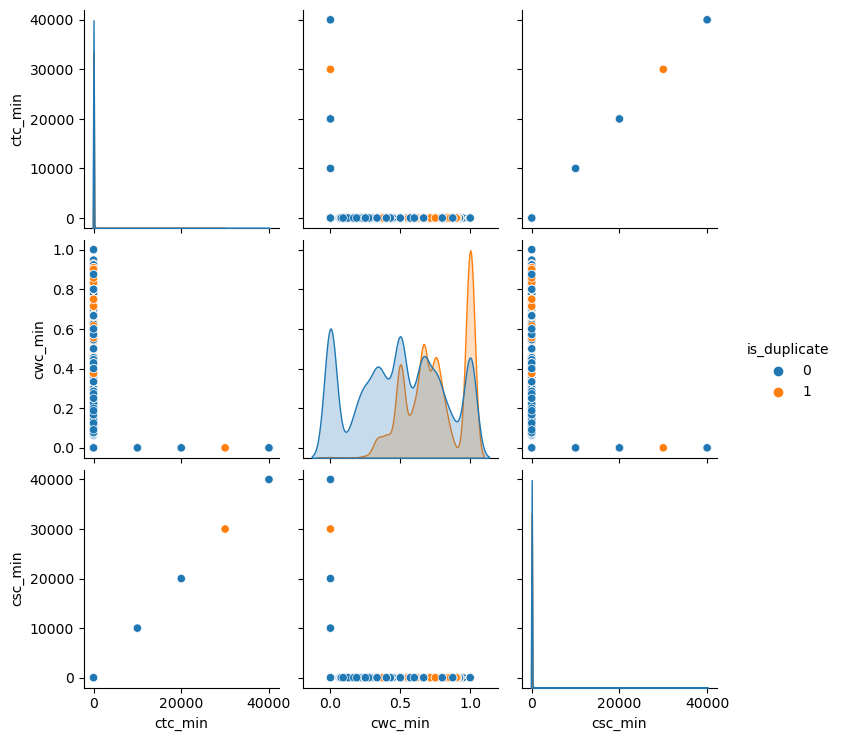

In [35]:
sns.pairplot(df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

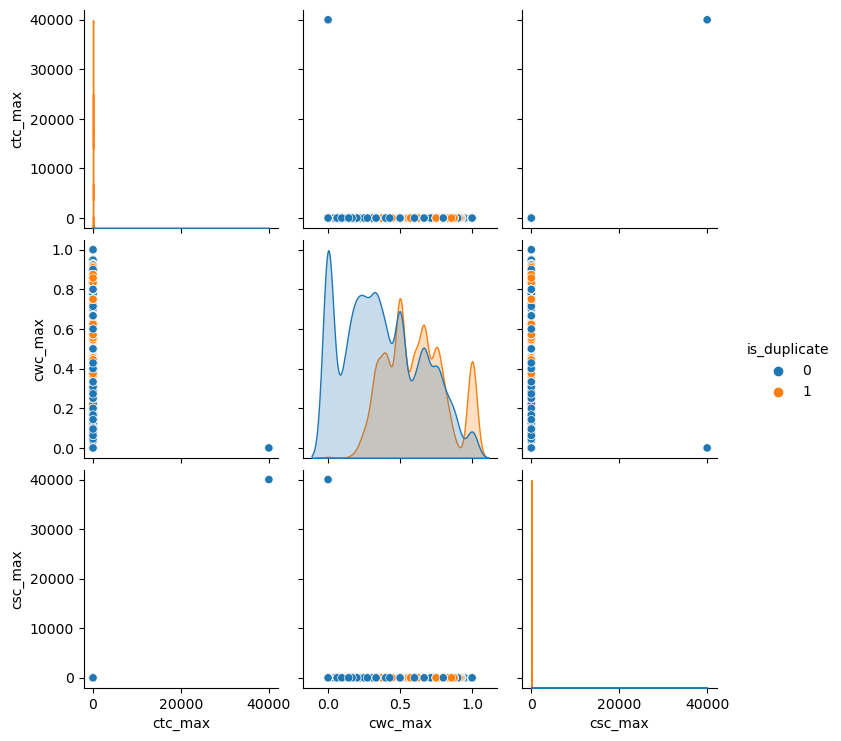

In [36]:
sns.pairplot(df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue='is_duplicate')

In [37]:
df['csc_max'].describe()

count    30000.000000
mean         1.819204
std        230.937694
min          0.000000
25%          0.181817
50%          0.399992
75%          0.666656
max      40000.000000
Name: csc_max, dtype: float64

In [38]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
 
sc = StandardScaler()
mx = MinMaxScaler()
df['csc_max'] = sc.fit_transform(df[['csc_max']])
df['csc_min'] = sc.fit_transform(df[['csc_min']])
df['ctc_max'] = sc.fit_transform(df[['ctc_max']])
df['ctc_min'] = sc.fit_transform(df[['ctc_min']])
df['cwc_max'] = sc.fit_transform(df[['cwc_max']])
df['cwc_min'] = sc.fit_transform(df[['cwc_min']])

df['csc_max'] = mx.fit_transform(df[['csc_max']])
df['csc_min'] = mx.fit_transform(df[['csc_min']])
df['ctc_max'] = mx.fit_transform(df[['ctc_max']])
df['ctc_min'] = mx.fit_transform(df[['ctc_min']])
df['cwc_max'] = mx.fit_transform(df[['cwc_max']])
df['cwc_min'] = mx.fit_transform(df[['cwc_min']])

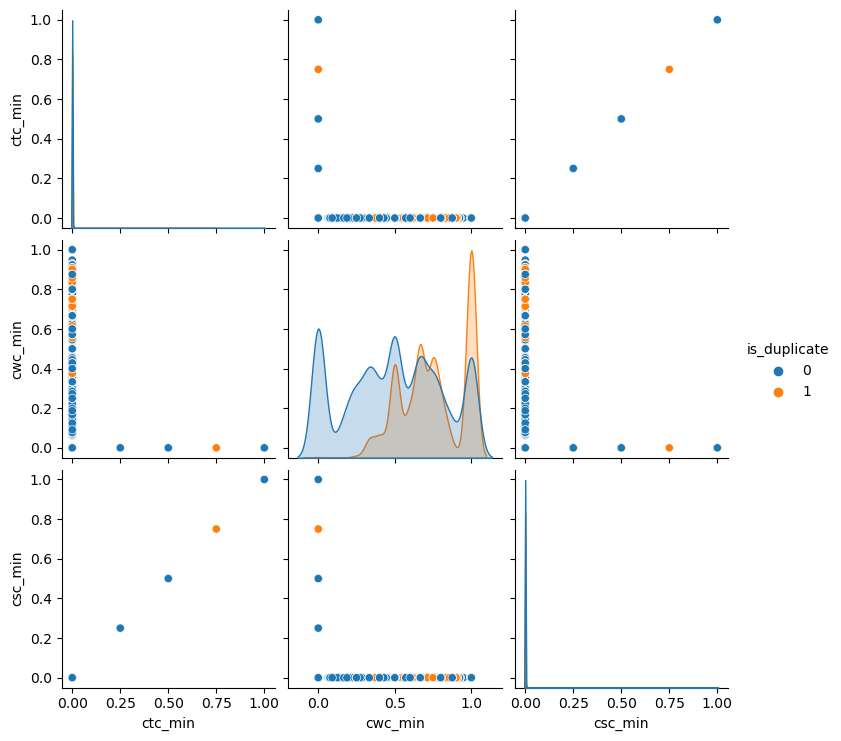

In [39]:
sns.pairplot(df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

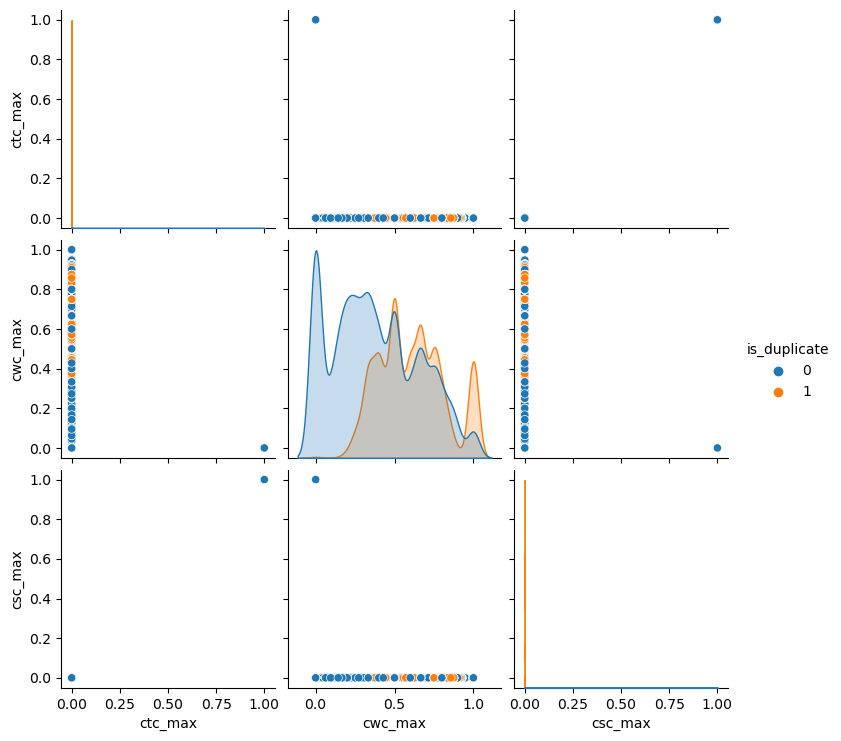

In [40]:
sns.pairplot(df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue='is_duplicate')

In [41]:
x =MinMaxScaler().fit_transform(df[['cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','First_word_eq','abs_len_diff','mean_len','longest_substr_ration','fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio']])
y = df['is_duplicate'].values

In [42]:
!pip install manifold

In [43]:
# from sklearn.manifold import TSNE

# tsne2d = TSNE(
#     n_components=2,
#     init='random',
#     random_state=101,
#     method='barnes_hut',
#     n_iter=1000,
#     verbose=2,
#     angle=0.5,
# ).fit_transform(x)

In [44]:
que_df = df[['question1','question2']]

In [45]:
que_df.head()

,question1,question2
90863,how do you know if you are bisexual or bicurious,how do you know if you are bisexual or bicurious
65994,why is eunuch and son of bitch more worried th...,india why is that despite of myanmar cambodi...
49790,i had so many very big and tight pimples on my...,what happened to ritchie valen s family after ...
71726,is donald trump fit to be president,would donald trump be a good president
5535,how do you hack someone s snapchat,how can i hack my snapchat password


In [46]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_words,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,First_word_eq,abs_len_diff,mean_len,longest_substr_ration,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
90863,1,48,48,10,10,9,18,0.50,0.999972,0.999973,...,0.000050,1.0,1.0,0.0,10.0,0.020408,100,100,100,100
65994,0,81,148,16,32,6,41,0.15,0.124999,0.090909,...,0.000011,0.0,0.0,11.0,21.5,0.012195,24,35,38,47
49790,0,148,58,32,10,2,35,0.06,0.000000,0.000000,...,0.000004,0.0,0.0,20.0,20.0,0.016949,19,43,33,35
71726,1,35,38,7,7,4,14,0.29,0.749985,0.599992,...,0.000005,1.0,0.0,0.0,7.0,0.027778,71,74,71,83
5535,1,34,35,7,7,3,14,0.21,0.666648,0.666649,...,0.000008,0.0,1.0,0.0,7.0,0.028571,61,62,58,67


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

questions =list(que_df['question1']) + list(que_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [48]:
temp_df1 = pd.DataFrame(q1_arr,index=que_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=que_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [49]:
final_df = pd.concat([final_df,temp_df],axis=1)
final_df.shape

(30000, 6023)

In [50]:
# questions =list(que_df['question1']) + list(que_df['question2'])

In [51]:
# import pandas as pd
# from gensim.models import Word2Vec
# import nltk
# from nltk.tokenize import word_tokenize
# from tqdm import tqdm
# import numpy as np

# que_df['question1_tokenized'] = que_df['question1'].apply(word_tokenize)
# que_df['question2_tokenized'] = que_df['question2'].apply(word_tokenize)

In [52]:
# model = Word2Vec(questions, vector_size=100, window=5, min_count=1, workers=4)

In [53]:
# def document_vector(doc, model):
#     words = doc
#     word_vecs = [model.wv[word] for word in words if word in model.wv]
#     if word_vecs:
#         return np.mean(word_vecs, axis=0)
#     else:
#         return np.zeros(model.vector_size)

In [54]:
# x_question1 = []
# for doc in tqdm(que_df['question1_tokenized'].values):
#     x_question1.append(document_vector(doc, model))

# x_question2 = []
# for doc in tqdm(que_df['question2_tokenized'].values):
#     x_question2.append(document_vector(doc, model))

In [55]:
# x_question1
# que_df['question2_vec'] = x_question2

In [56]:
# que_df.shape

In [57]:
# final_df.head()

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [59]:
# temp_df1 = pd.DataFrame(x_question1,index=que_df.index)

In [60]:
# temp_df1

In [61]:
# temp_df2 = pd.DataFrame(x_question2,index=que_df.index)

In [62]:
# temp_df = pd.concat([temp_df1,temp_df2],axis=1)

In [63]:
# final_df = pd.concat([final_df,temp_df],axis=1)

In [64]:
# final_df.shape

In [65]:
# final_df.head()

In [66]:
# final_df.info()

In [67]:
x = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [68]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [72]:
x_train.columns = x_train.columns.astype(str)

In [73]:
x_train.head()

,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_words,word_share,cwc_min,cwc_max,csc_min,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
98887,39,40,7,7,1,14,0.07,0.249995,0.199997,0.000000,...,0,0,0,0,0,0,0,0,0,0
53904,45,65,9,12,7,21,0.33,0.833324,0.624996,0.000008,...,0,0,0,0,0,0,0,0,0,0
72182,43,54,11,13,4,23,0.17,0.666648,0.399995,0.000017,...,0,0,0,0,0,0,0,0,0,0
96365,48,54,10,11,6,21,0.29,0.249995,0.199997,0.000031,...,0,0,0,0,0,0,0,0,0,0
58517,36,55,5,8,4,13,0.31,0.749985,0.599992,0.000006,...,0,0,0,0,0,0,0,0,0,0


In [74]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [75]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 98887 to 92684
Columns: 6022 entries, q1_len to 2999
dtypes: float64(12), int64(6010)
memory usage: 1.1 GB


In [76]:
x_test.columns = x_test.columns.astype(str)

In [77]:
y_pred = rf.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_scoreaccu

In [79]:
accuracy_score(y_test,y_pred)

0.7805

In [80]:
# Ensure y_train is 1D
if y_train.ndim != 1:
    y_train = y_train.ravel()

In [81]:
from sklearn.tree import DecisionTreeClassifier

de = DecisionTreeClassifier()

In [82]:
de.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
y_pred_de = de.predict(x_test)

In [84]:
accuracy_score(y_test,y_pred_de)

0.7301666666666666

In [85]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [86]:
y_pred_lr = lr.predict(x_test)

In [87]:
accuracy_score(y_test,y_pred_lr)

0.7246666666666667

In [88]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()

ab.fit(x_train,y_train)

AdaBoostClassifier()

In [89]:
y_pred_ab = ab.predict(x_test)

In [90]:
accuracy_score(y_test,y_pred_ab)

0.7398333333333333

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
confusion_matrix(y_test,y_pred)

array([[3183,  577],
       [ 740, 1500]], dtype=int64)

In [93]:
confusion_matrix(y_test,y_pred_de)

array([[2965,  795],
       [ 824, 1416]], dtype=int64)

In [94]:
confusion_matrix(y_test,y_pred_ab)

array([[3086,  674],
       [ 887, 1353]], dtype=int64)

In [104]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [105]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [106]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
     
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [107]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [108]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [109]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    fuzzy_feature = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_feature)
    
    q1_bow = cv.transform([q1]).toarray() 
    
    q2_bow = cv.transform([q2]).toarray()
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [129]:
q1 = 'Where is the capital of india?'
q2 = 'What is the capital of Pakistan?'

In [130]:
query_point_creator(q1,q2)

array([[29., 31.,  6., ...,  0.,  0.,  0.]])

In [131]:
rf.predict(query_point_creator(q1,q2))

array([0], dtype=int64)

In [132]:
import pickle

pickle.dump(rf,open('model_rf.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))